#   Introdução

Nós vamos usar uma base de dados do Kaggle chamada [Fraud Detection Example](https://www.kaggle.com/gopalmahadevan/fraud-detection-example) e ela tem uma fração de dados do [PaySim](https://github.com/EdgarLopezPhD/PaySim), um simulador de dados financeiros feito exatamente para detecção de fraude.

**Variáveis do dataset**

**step** - mapeia uma unidade de tempo no mundo real. Neste caso, 1 passo é 1 hora de tempo. Total de etapas 744 (simulação de 30 dias).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER. 
(caixa-de-entrada, caixa-de-saida, débito, pagamento e transferência)

**amount** - valor da transação em moeda local.

**nameOrig** - cliente que iniciou a transação

**oldbalanceOrg** - saldo inicial antes da transação

**newbalanceOrig** - novo saldo após a transação

**nameDest** - cliente que é o destinatário da transação

**oldbalanceDest** - destinatário do saldo inicial antes da transação. 
Não há informações para clientes que começam com M (Comerciantes).

**newbalanceDest** - novo destinatário do saldo após a transação. Não há informações para clientes que começam com M (Comerciantes).

**isFraud** - São as transações feitas pelos agentes fraudulentos dentro da simulação. Neste conjunto de dados específico, o comportamento fraudulento dos agentes visa lucrar ao assumir o controle das contas dos clientes e tentar esvaziar os fundos transferindo para outra conta e depois sacando do sistema.

**isFlaggedFraud** - O modelo de negócios visa controlar transferências massivas de uma conta para outra e sinaliza tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.


# Importação dos dados

## Análise com Pandas

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("fraud_dataset_example.csv")

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Outras informações do dataset

In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,101613.000000,101613.0
mean,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06,0.001142,0.0
std,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06,0.033768,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04,0.000000,0.0
75%,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


O método describe() fornece as informações sobre:

**count** - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

**mean** - O valor médio, em média aritmética. Como ele faz uma média aritmética nem sempre mostra a realidade da maior parte dos casos do banco de dados.

**std** - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

**min** e **max** - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

**quartis** - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.

Para saber mais sobre esse método, acesse o artigo [Ampliando a análise com o Describe](https://www.alura.com.br/artigos/ampliando-a-analise-com-describe).


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [6]:
data.groupby("isFraud").count()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,,,,
0,101497,101497,101497,101497,101497,101497,101497,101497,101497,101497
1,116,116,116,116,116,116,116,116,116,116


## Encoding

### Pandas Profiling

In [7]:
# import pandas_profiling as pdp

In [8]:
# pdp.ProfileReport(data)

# Pré-processamento dos Dados

### Aplicando o Encoding

#### **Tipos de encoding**

**Label Encoding** - Renomea as classes com valores numéricos de 1 a **n**, sendo n o número de classes. Pode existir hierarquia entre as classes.

**One-Hot Encoding** - Transforma as variáveis em **n** colunas binárias, sendo n o número de classes. Todas as classes são analisadas de forma igual, quando tiver a ocorrência dela a coluna terá o valor 1 e quando não o valor 0, isso acontece para as demais colunas criadas.



In [9]:
data = pd.get_dummies(data, columns=["type"])

data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,False,True,False


#### Removendo variáveis

In [10]:
data.drop(columns = ["nameDest", "nameOrig", "isFlaggedFraud"], inplace = True)

In [11]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,False,True,False


### Resampling the data 

In [12]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(data.drop("isFraud", axis=1), data["isFraud"])
data = pd.concat([y_resampled, X_resampled], axis=1)

### Correlação

<Axes: >

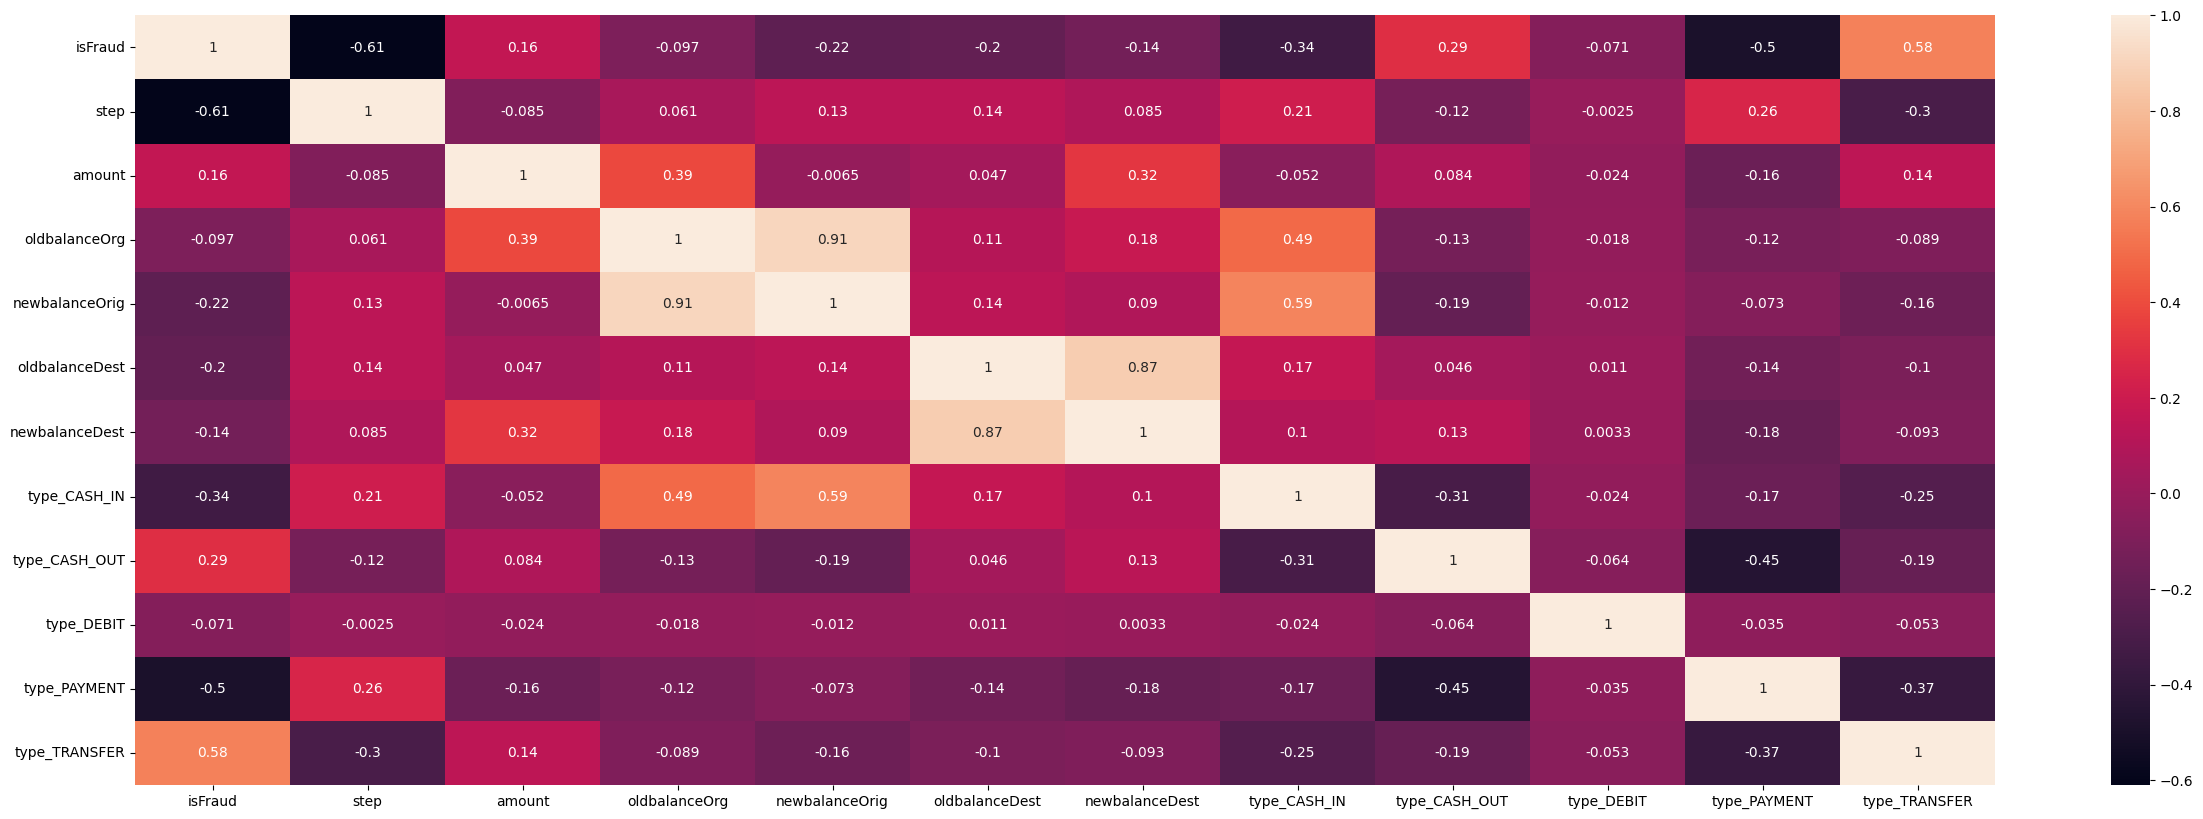

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
sns.heatmap(data.corr(), annot=True)

### Hipóteses

- tipo_PAYMENT é o que os usuários mais utiliza como padrão e a fraude ocorre, normalmente, por meio do tipo_TRANSFER

- O cliente pode fazer seus pagamentos durante um período do dia, como por exemplo durante a manhã, e a fraude ocorre durante um período diferente, como a madrugada.

- O cliente paga as duas contas no comoeço do mês e houve uma movimentação no final do mês, sendo uma fraude.

# Modelagem

## Regressão Logística

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

X = data.drop(columns=["isFraud"])
y = data["isFraud"]

y_pred = cross_val_predict(pipeline, X, y, cv = 5)

print("Accuracy: ", accuracy_score(y, y_pred)) 
print("Precision: ", precision_score(y, y_pred))
print("Recall: ", recall_score(y, y_pred)) 
print("F1: ", f1_score(y, y_pred))


Accuracy:  0.9501709410130349
Precision:  0.9338137556492347
Recall:  0.9690237149866499
F1:  0.9510929741177153


### Matrix de Confusão

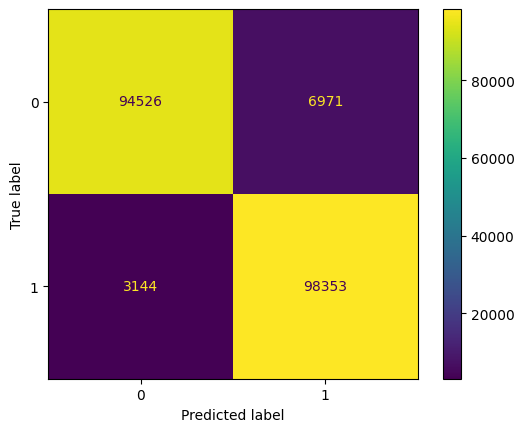

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot(values_format='d')


### Curva ROC

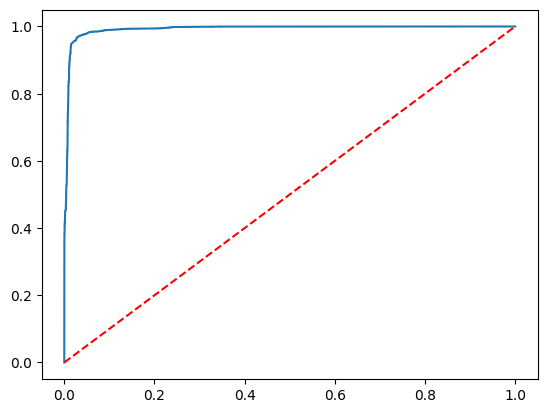

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

y_pred_proba = pipeline.predict_proba(X_test)[::, 1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')

## Árvore de Decisão

In [17]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth=5))
])

X = data.drop(columns=["isFraud"])
y = data["isFraud"]

y_pred = cross_val_predict(pipeline, X, y, cv = 5)

print("Accuracy: ", accuracy_score(y, y_pred)) # Accuracy score for prediction  
print("Precision: ", precision_score(y, y_pred))
print("Recall: ", recall_score(y, y_pred)) 
print("F1: ", f1_score(y, y_pred))


Accuracy:  0.885208429805807
Precision:  0.8275347870887751
Recall:  0.973250440899731
F1:  0.8944971158983275


### Matrix de Confusão

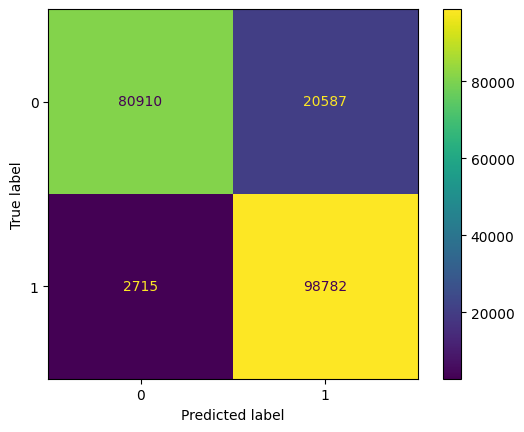

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot(values_format='d')


### Curva ROC

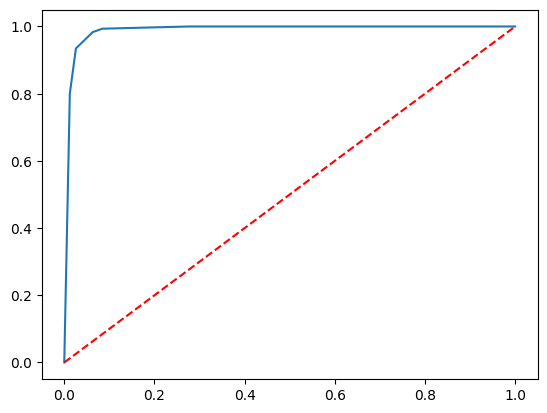

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

y_pred_proba = pipeline.predict_proba(X_test)[::, 1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(max_depth=5))
])

X = data.drop(columns=["isFraud"])
y = data["isFraud"]

y_pred = cross_val_predict(pipeline, X, y, cv = 5)

print("Accuracy: ", accuracy_score(y, y_pred)) # Accuracy score for prediction  
print("Precision: ", precision_score(y, y_pred))
print("Recall: ", recall_score(y, y_pred)) 
print("F1: ", f1_score(y, y_pred))


Accuracy:  0.9046966905425776
Precision:  0.8613415438750824
Recall:  0.9646886114860538
F1:  0.9100905322253825


### Matrix de Confusão

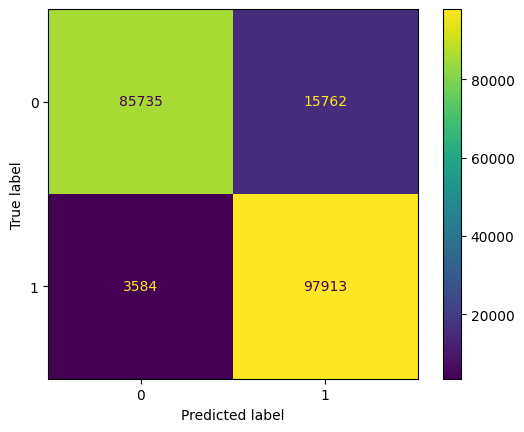

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot(values_format='d')


### Curva ROC

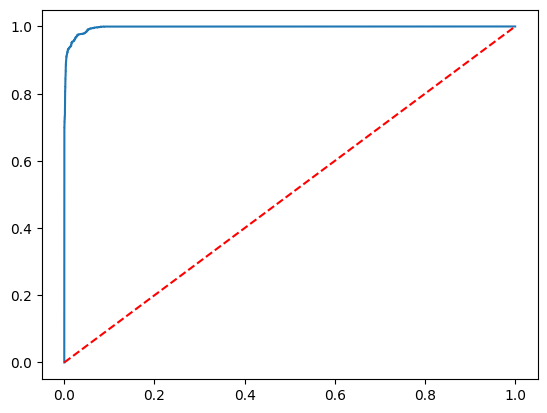

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

y_pred_proba = pipeline.predict_proba(X_test)[::, 1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')

# Melhorando o modelo (Regressão Logística)

In [24]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import uniform, randint

params = {
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': uniform(0.001, 100),
    'classifier__max_iter': randint(100, 10000)
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

X = data.drop(columns=["isFraud"])
y = data["isFraud"]

search = RandomizedSearchCV(pipeline, params, n_iter=1, scoring='roc_auc', n_jobs=14, cv=KFold(n_splits=2, shuffle=True), verbose=3)
search.fit(X, y)

print(search.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
{'classifier__C': 91.25094496474605, 'classifier__max_iter': 3899, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


# Resultados Finais

In [ ]:
pipeline = search.best_estimator_

y_pred = cross_val_predict(pipeline, X, y, cv=KFold(n_splits=5, shuffle=True), n_jobs=14)

print("Accuracy: ", accuracy_score(y, y_pred)) 
print("Precision: ", precision_score(y, y_pred))
print("Recall: ", recall_score(y, y_pred))
print("F1: ", f1_score(y, y_pred))

Accuracy:  0.9718021222302137
Precision:  0.9715976797549758
Recall:  0.9720188774052435
F1:  0.9718082329416168


### Matrix de Confusão

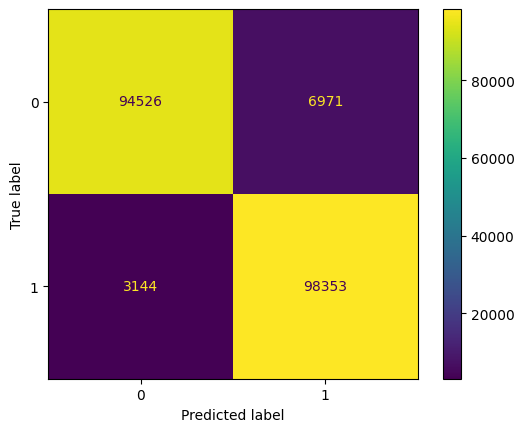

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot(values_format='d')


### Curva ROC

c:\Users\heady\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


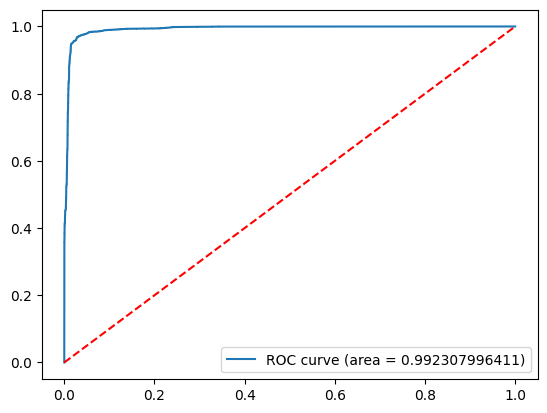

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

y_pred_proba = pipeline.predict_proba(X_test)[::, 1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.12f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.legend(loc="lower right")

# Conclusão

• O(a) cliente tem um certo padrão de movimentação do dinheiro, em horário comercial, e a fraude ocorreu fora deste horário, como por exemplo durante a madrugada.

• Ainda em relação ao tempo, o cliente pode fazer suas principais movimentações em um período inicial do mês e a fraude foi vista em um dia não habitual.

      - Fazer um CAPTCHA para aumentar a segurança em horários não convencionais.

• O(a) cliente utiliza como padrão o pagamento em dinheiro, seja por PIX ou retirada*, e a fraude pode ocorrer por um pagamento por transferência.

      - Solicitar uma verificação de informação adicional do banco, como uma pergunta de segurança, para movimentações de transferência.


